# Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector
import numpy as np
import scipy

# Parte I

## Lendo os Dados

In [2]:
df = pd.read_csv('climate_change.csv')
df

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


## Feature Engineering

In [3]:
standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df.drop(['Year', 'Month', 'Temp'], axis=1))
df_standard = pd.DataFrame(df_standard, columns=df.drop(['Year', 'Month', 'Temp'], axis=1).columns, index=df.drop(['Year', 'Month', 'Temp'], axis=1).index)
df_standard = sm.add_constant(df_standard)
df_standard['Temp'] = df['Temp']
df_standard

,const,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1.0,2.435346,-1.367493,-2.419359,-1.670583,-3.002591,-2.553339,0.079308,2.401281,0.109
1,1.0,2.019923,-1.402340,-2.525499,-1.657356,-2.966302,-2.523287,0.125428,2.163370,0.118
2,1.0,1.564986,-1.510841,-2.536157,-1.647963,-2.928626,-2.490775,0.536998,1.946146,0.137
3,1.0,0.912484,-1.661317,-2.576829,-1.639529,-2.889812,-2.457726,0.875879,1.746163,0.176
4,1.0,0.162800,-1.826049,-2.205991,-1.627644,-2.850701,-2.425994,0.407913,1.559971,0.149
...,...,...,...,...,...,...,...,...,...,...
303,1.0,-0.578341,1.657080,0.653709,1.727772,-0.384826,0.650360,-1.037093,-0.450209,0.407
304,1.0,-0.980949,1.573130,0.984310,1.751542,-0.390618,0.649945,-1.017793,-0.426074,0.378
305,1.0,-1.127255,1.565210,1.399737,1.802724,-0.390767,0.647849,-0.989720,-0.415730,0.440
306,1.0,-0.957454,1.655496,1.360369,1.844322,-0.383588,0.647485,-0.913021,-0.408834,0.394


In [4]:
df_standard_train, df_standard_test = train_test_split(df_standard, train_size=0.7, random_state=123)

In [5]:
X = df_standard.drop('Temp', axis=1)
Y = df_standard['Temp']

## Feature Selection

In [6]:
rfecv_RFC = RFECV(estimator=LinearRegression(), scoring='neg_mean_squared_error')
rfecv_RFC.fit(X,Y)

mask_RFC = rfecv_RFC.support_

cols_RFE= [not x for x in mask_RFC]
cols_RFE= X.loc[:,cols_RFE].columns.tolist()

cols_RFE

['const', 'MEI', 'CO2', 'CH4', 'N2O', 'TSI', 'Aerosols']

## Modelo

In [7]:
X_treino = df_standard_train.loc[:, cols_RFE]
Y_treino = df_standard_train['Temp']

modelo = sm.OLS(Y_treino, X_treino)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           5.34e-58
Time:                        19:42:53   Log-Likelihood:                 211.73
No. Observations:                 215   AIC:                            -409.5
Df Residuals:                     208   BIC:                            -385.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2662      0.006     42.201      0.0

In [8]:
cols_RFE.remove('CH4')

X_treino = df_standard_train.loc[:, cols_RFE]
Y_treino = df_standard_train['Temp']

modelo = sm.OLS(Y_treino, X_treino)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           4.69e-59
Time:                        19:42:53   Log-Likelihood:                 211.72
No. Observations:                 215   AIC:                            -411.4
Df Residuals:                     209   BIC:                            -391.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2662      0.006     42.300      0.0

In [9]:
cols_RFE.remove('CO2')

X_treino = df_standard_train.loc[:, cols_RFE]
Y_treino = df_standard_train['Temp']

modelo = sm.OLS(Y_treino, X_treino)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     145.7
Date:                Thu, 16 Jun 2022   Prob (F-statistic):           2.04e-59
Time:                        19:42:53   Log-Likelihood:                 209.94
No. Observations:                 215   AIC:                            -409.9
Df Residuals:                     210   BIC:                            -393.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2670      0.006     42.298      0.0

## Análise de Erros

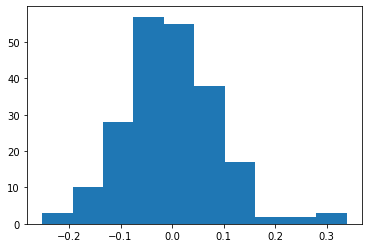

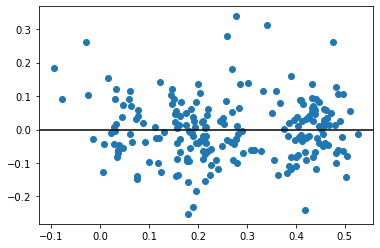

In [10]:
Y_treino_predict = modelo.predict(X_treino)
erro = Y_treino - Y_treino_predict
plt.hist(erro)
plt.show()

plt.scatter(Y_treino_predict, erro)
plt.axhline(0, color='black')
plt.show()

In [11]:
X_teste = df_standard_test.loc[:, cols_RFE]
Y_teste = df_standard_test['Temp']

Y_predict_teste = modelo.predict(X_teste)

r2_teste = r2_score(Y_teste, Y_predict_teste)
mse_teste = mean_squared_error(Y_teste, Y_predict_teste)
rmse_teste = np.sqrt(mse_teste)

print(f'As medidas de erro no conjunto de teste foram: R2 = {round(r2_teste,2)}; MSE = {round(mse_teste,2)}; RMSE = {round(rmse_teste,2)}')

As medidas de erro no conjunto de teste foram: R2 = 0.65; MSE = 0.01; RMSE = 0.11


# Parte II

## Lendo os Dados

In [12]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009train.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/pisa2009test.csv')
df = pd.concat([df_1, df_2], ignore_index=True)
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228,9,1,White,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,300.0,20.0,1.0,1,0,987.0,465.58
5229,11,0,White,1.0,0.0,1.0,0.0,NaN,1.0,0.0,...,1.0,1.0,0.0,450.0,25.0,1.0,1,0,987.0,380.18
5230,10,0,Hispanic,1.0,1.0,1.0,NaN,1.0,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,1.0,1,0,987.0,324.10
5231,10,0,White,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,450.0,20.0,1.0,1,0,987.0,596.34


## Feature Engineering

### Dados Faltantes

In [13]:
df.dropna(axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
1,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
2,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
3,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
4,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,10,0,White,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,270.0,25.0,1.0,1,1,2999.0,667.20
3400,10,0,Hispanic,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,270.0,28.0,1.0,1,1,2999.0,541.76
3401,9,1,White,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,300.0,20.0,1.0,1,0,987.0,465.58
3402,10,0,White,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,450.0,20.0,1.0,1,0,987.0,596.34


### Dados Categóricos

In [14]:
df = pd.get_dummies(df)
df

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,urban,schoolSize,readingScore,raceeth_American Indian/Alaska Native,raceeth_Asian,raceeth_Black,raceeth_Hispanic,raceeth_More than one race,raceeth_Native Hawaiian/Other Pacific Islander,raceeth_White
0,11,1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,1173.0,575.01,0,0,0,0,0,0,1
1,10,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1,2640.0,458.11,0,0,1,0,0,0,0
2,10,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1095.0,613.89,0,0,0,1,0,0,0
3,10,0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1913.0,439.36,0,0,0,0,0,0,1
4,10,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0,899.0,465.90,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,10,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1,2999.0,667.20,0,0,0,0,0,0,1
3400,10,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,2999.0,541.76,0,0,0,1,0,0,0
3401,9,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,987.0,465.58,0,0,0,0,0,0,1
3402,10,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,987.0,596.34,0,0,0,0,0,0,1


## Feature Selection

In [15]:
X = df.drop('readingScore', axis=1)
Y = df['readingScore']

In [16]:
ffs = SequentialFeatureSelector(LinearRegression(), k_features='best', forward=True, n_jobs=1)
ffs.fit(X, Y)
ffs_features = list(ffs.k_feature_names_)
ffs_features

['grade',
 'male',
 'expectBachelors',
 'motherBachelors',
 'fatherHS',
 'fatherBachelors',
 'computerForSchoolwork',
 'read30MinsADay',
 'studentsInEnglish',
 'publicSchool',
 'schoolSize',
 'raceeth_Asian',
 'raceeth_Black',
 'raceeth_Hispanic',
 'raceeth_More than one race',
 'raceeth_Native Hawaiian/Other Pacific Islander',
 'raceeth_White']

## Modelo

In [17]:
df_train, df_test = train_test_split(df)

In [18]:
X_train = df_train.loc[:, ffs_features]
X_train = sm.add_constant(X_train)
Y_train = df_train['readingScore']

In [19]:
modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     69.82
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.04e-196
Time:                        19:42:57   Log-Likelihood:                -14619.
No. Observations:                2553   AIC:                         2.927e+04
Df Residuals:                    2535   BIC:                         2.938e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [20]:
ffs_features.remove('studentsInEnglish')

X_train = df_train.loc[:, ffs_features]
X_train = sm.add_constant(X_train)
Y_train = df_train['readingScore']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     74.17
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.44e-197
Time:                        19:42:57   Log-Likelihood:                -14619.
No. Observations:                2553   AIC:                         2.927e+04
Df Residuals:                    2536   BIC:                         2.937e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [21]:
ffs_features.remove('raceeth_Black')

X_train = df_train.loc[:, ffs_features]
X_train = sm.add_constant(X_train)
Y_train = df_train['readingScore']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     79.07
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          2.40e-198
Time:                        19:42:58   Log-Likelihood:                -14619.
No. Observations:                2553   AIC:                         2.927e+04
Df Residuals:                    2537   BIC:                         2.936e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [22]:
ffs_features.remove('fatherHS')

X_train = df_train.loc[:, ffs_features]
X_train = sm.add_constant(X_train)
Y_train = df_train['readingScore']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:           readingScore   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     84.11
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          5.33e-198
Time:                        19:42:58   Log-Likelihood:                -14622.
No. Observations:                2553   AIC:                         2.927e+04
Df Residuals:                    2538   BIC:                         2.936e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

## Análise de Erros

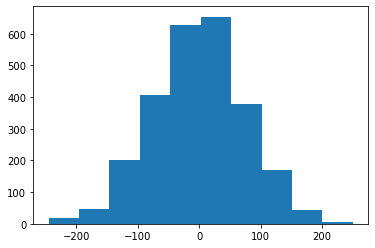

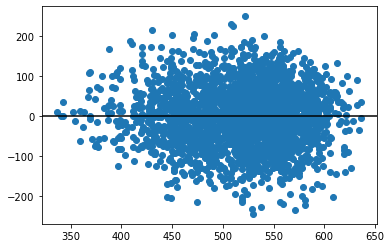

In [23]:
Y_train_predict = modelo.predict(X_train)
erro = Y_train - Y_train_predict
plt.hist(erro)
plt.show()
plt.scatter(Y_train_predict, erro)
plt.axhline(0, color='black')
plt.show()

### Treino

In [24]:
r2_train = r2_score(Y_train, Y_train_predict)
r2_train

0.316918507482277

In [25]:
mse = mean_squared_error(Y_train, Y_train_predict)
mse

5525.581560117488

In [26]:
rmse = np.sqrt(mse)
rmse

74.33425563034507

### Teste

In [27]:
X_test = df_test.loc[:, ffs_features]
X_test = sm.add_constant(X_test)
Y_test = df_test['readingScore']
Y_test_predict = modelo.predict(X_test)

In [28]:
r2_test = r2_score(Y_test, Y_test_predict)
r2_test

0.2661716019035132

In [29]:
mse_test = mean_squared_error(Y_test, Y_test_predict)
mse_test

5520.648396301799

In [30]:
rmse_test = np.sqrt(mse_test)
rmse_test

74.30106591632315

# Parte III

## Lendo os Dados

In [31]:
df=pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/FluTrain.csv')
df

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436
...,...,...,...
412,2011-11-27 - 2011-12-03,1.465723,0.478088
413,2011-12-04 - 2011-12-10,1.518106,0.464807
414,2011-12-11 - 2011-12-17,1.663954,0.479416
415,2011-12-18 - 2011-12-24,1.852736,0.537849


## Feature Engineering

In [32]:
df['LAG1'] = df['ILI'].shift(periods=1, fill_value=0)
df['LAG2'] = df['ILI'].shift(periods=2, fill_value=0)
df['LAG3'] = df['ILI'].shift(periods=3, fill_value=0)
df['LAG4'] = df['ILI'].shift(periods=4, fill_value=0)
df['LAG5'] = df['ILI'].shift(periods=5, fill_value=0)
df

,Week,ILI,Queries,LAG1,LAG2,LAG3,LAG4,LAG5
0,2004-01-04 - 2004-01-10,2.418331,0.237716,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004-01-11 - 2004-01-17,1.809056,0.220452,2.418331,0.000000,0.000000,0.000000,0.000000
2,2004-01-18 - 2004-01-24,1.712024,0.225764,1.809056,2.418331,0.000000,0.000000,0.000000
3,2004-01-25 - 2004-01-31,1.542495,0.237716,1.712024,1.809056,2.418331,0.000000,0.000000
4,2004-02-01 - 2004-02-07,1.437868,0.224436,1.542495,1.712024,1.809056,2.418331,0.000000
...,...,...,...,...,...,...,...,...
412,2011-11-27 - 2011-12-03,1.465723,0.478088,1.655415,1.462212,1.440892,1.452843,1.305461
413,2011-12-04 - 2011-12-10,1.518106,0.464807,1.465723,1.655415,1.462212,1.440892,1.452843
414,2011-12-11 - 2011-12-17,1.663954,0.479416,1.518106,1.465723,1.655415,1.462212,1.440892
415,2011-12-18 - 2011-12-24,1.852736,0.537849,1.663954,1.518106,1.465723,1.655415,1.462212


## Modelo

In [33]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=123)

In [34]:
X_train = df_train.drop(['Week', 'ILI'], axis=1)
X_train = sm.add_constant(X_train)

Y_train = df_train['ILI']

In [35]:
modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    ILI   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     996.5
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          1.59e-187
Time:                        19:42:59   Log-Likelihood:                -15.614
No. Observations:                 291   AIC:                             45.23
Df Residuals:                     284   BIC:                             70.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.033     -0.385      0.7

In [36]:
colunas = df_train.drop(['Week', 'ILI'], axis=1).columns.tolist()
colunas.remove('LAG4')

X_train = df_train.loc[:, colunas]
X_train = sm.add_constant(X_train)
Y_train = df_train['ILI']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    ILI   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1199.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          4.99e-189
Time:                        19:42:59   Log-Likelihood:                -15.749
No. Observations:                 291   AIC:                             43.50
Df Residuals:                     285   BIC:                             65.54
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0129      0.033     -0.388      0.6

In [37]:
colunas.remove('LAG5')

X_train = df_train.loc[:, colunas]
X_train = sm.add_constant(X_train)
Y_train = df_train['ILI']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    ILI   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1485.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          6.85e-190
Time:                        19:42:59   Log-Likelihood:                -17.515
No. Observations:                 291   AIC:                             45.03
Df Residuals:                     286   BIC:                             63.40
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.032      0.086      0.9

In [38]:
colunas.remove('LAG3')

X_train = df_train.loc[:, colunas]
X_train = sm.add_constant(X_train)
Y_train = df_train['ILI']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    ILI   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1972.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          3.78e-191
Time:                        19:42:59   Log-Likelihood:                -18.512
No. Observations:                 291   AIC:                             45.02
Df Residuals:                     287   BIC:                             59.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0074      0.032     -0.235      0.8

In [39]:
X_train = df_train.loc[:, colunas]
Y_train = df_train['ILI']

modelo = sm.OLS(Y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                    ILI   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              6235.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):                   1.46e-261
Time:                        19:42:59   Log-Likelihood:                         -18.540
No. Observations:                 291   AIC:                                      43.08
Df Residuals:                     288   BIC:                                      54.10
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Análise de Erros

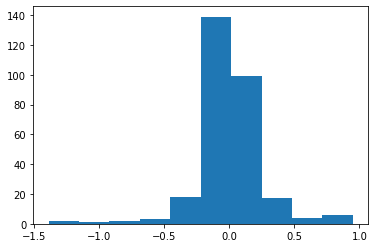

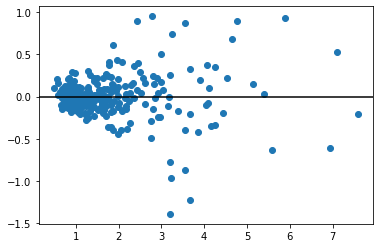

In [40]:
Y_train_predict = modelo.predict(X_train)
erro = Y_train - Y_train_predict
plt.hist(erro)
plt.show()
plt.scatter(Y_train_predict, erro)
plt.axhline(0, color='black')
plt.show()

In [41]:
def shapiro_test(data, alpha=0.05):
    stat, p = scipy.stats.shapiro(data)
    print('p-valor: p=%.3f' % (p))
    # interpret
    alpha = alpha
    if p > alpha:
        print('A amostra parece ser normalmente distribuiída Gaussian. Não rejeitamos H0')
    else:
        print('A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0')
    return stat, p

In [42]:
shapiro_test(erro)

p-valor: p=0.000
A amostra NÃO parece ser normalmente distribuiída Gaussian. Rejeitamos H0


(0.8599133491516113, 1.43202248799009e-15)

### Treino

In [43]:
mse = mean_squared_error(Y_train, Y_train_predict)
mse

0.06650662129728457

In [44]:
rmse = np.sqrt(mse)
rmse

0.2578887769897802

### Teste

In [45]:
X_test = df_test.loc[:, colunas]
Y_test = df_test['ILI']
Y_test_predict = modelo.predict(X_test)

In [46]:
r2_test = r2_score(Y_test, Y_test_predict)
r2_test

0.8504341126521944

In [47]:
mse_test = mean_squared_error(Y_test, Y_test_predict)
mse_test

0.12788678803708997

In [48]:
rmse_test = np.sqrt(mse_test)
rmse_test

0.3576126228715787

# Parte IV

## Lendo os Dados

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/abnr/ml-data/main/baseball.csv')
df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


## Feature Engineering

In [50]:
df_dummies = pd.get_dummies(df['League'])
df_dummies

,AL,NL
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
1227,0,1
1228,0,1
1229,0,1
1230,0,1


In [51]:
df['index'] = df.index
df_dummies['index'] = df_dummies.index

In [52]:
df = df.merge(df_dummies, how='left', left_on='index', right_on='index')
df.drop(['index', 'League'], axis=1, inplace=True)
df

,Team,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,AL,NL
0,ARI,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,0,1
1,ATL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,0,1
2,BAL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,1,0
3,BOS,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,1,0
4,CHC,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,0,1
1228,PIT,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,0,1
1229,SFG,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,0,1
1230,STL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,0,1


In [53]:
teams = df.loc[:, ['Team']]
order_levels = teams['Team'].unique().tolist()

In [54]:
oe = OrdinalEncoder(categories=[order_levels])
df['Team_Ordinal'] = oe.fit_transform(teams)
df

,Team,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,AL,NL,Team_Ordinal
0,ARI,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,0,1,0.0
1,ATL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,0,1,1.0
2,BAL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,1,0,2.0
3,BOS,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,1,0,3.0
4,CHC,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,0,1,20.0
1228,PIT,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,0,1,21.0
1229,SFG,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,0,1,24.0
1230,STL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,0,1,25.0


In [55]:
df['Champion'] = df['RankPlayoffs'].map(lambda x: 1 if x == 1 else 0)
df

,Team,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,AL,NL,Team_Ordinal,Champion
0,ARI,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,0,1,0.0,0
1,ATL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,0,1,1.0,0
2,BAL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,1,0,2.0,0
3,BOS,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,1,0,3.0,0
4,CHC,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,0,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,0,1,20.0,0
1228,PIT,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,0,1,21.0,0
1229,SFG,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,0,1,24.0,0
1230,STL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,0,1,25.0,0


In [56]:
df.dropna(subset=['RS','RA','W','OBP','SLG','BA','Playoffs','G','OOBP','OSLG','AL','NL','Team_Ordinal'],inplace=True)
df

,Team,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,AL,NL,Team_Ordinal,Champion
0,ARI,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,0,1,0.0,0
1,ATL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,0,1,1.0,0
2,BAL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,1,0,2.0,0
3,BOS,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,1,0,3.0,0
4,CHC,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,0,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,SFG,1999,872,831,86,0.356,0.434,0.271,0,NaN,NaN,162,0.345,0.423,0,1,24.0,0
416,STL,1999,809,838,75,0.338,0.426,0.262,0,NaN,NaN,161,0.355,0.427,0,1,25.0,0
417,TBD,1999,772,913,69,0.343,0.411,0.274,0,NaN,NaN,162,0.371,0.448,1,0,31.0,0
418,TEX,1999,945,859,95,0.361,0.479,0.293,1,5.0,4.0,162,0.346,0.459,1,0,27.0,0


In [57]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=123)

## Feature Selection

In [58]:
X_train = df_train.drop(['Team', 'Year', 'RankSeason', 'RankPlayoffs', 'Champion'], axis=1)
Y_train = df_train['Champion']

In [59]:
rfecv_RFC = RFECV(estimator=LogisticRegression(), scoring='neg_mean_squared_error')
rfecv_RFC.fit(X_train,Y_train)

mask_RFC = rfecv_RFC.support_

cols_RFE= [not x for x in mask_RFC]
cols_RFE= X_train.loc[:,cols_RFE].columns.tolist()

cols_RFE

/Users/thiagoosorio/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/thiagoosorio/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

['RS',
 'RA',
 'W',
 'OBP',
 'SLG',
 'BA',
 'G',
 'OOBP',
 'OSLG',
 'AL',
 'NL',
 'Team_Ordinal']

## Modelo

In [60]:
cols_RFE.remove('Team_Ordinal')

In [61]:
X_train = df_train.loc[:, cols_RFE]
Y_train = df_train['Champion']

In [62]:
modelo = LogisticRegression(fit_intercept=True)
modelo = modelo.fit(X_train, Y_train)

In [63]:
Y_train_predict = modelo.predict(X_train)
Y_train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
acuracia = accuracy_score(Y_train, Y_train_predict)
acuracia

0.9591836734693877

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)

In [66]:
matriz_confusao = confusion_matrix(Y_train, Y_train_predict, labels=[1, 0])

In [67]:
class_names = ['Campeão', 'Não Campeão']

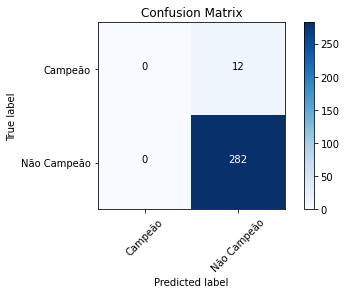

In [68]:
plot_confusion_matrix(matriz_confusao, classes=class_names, title='Confusion Matrix')

In [69]:
model_probabilities = modelo.predict_proba(X_train)[:, 1]
false_positive_rate_values, sensitivity_values, thresholds = roc_curve(Y_train, model_probabilities, pos_label=1)

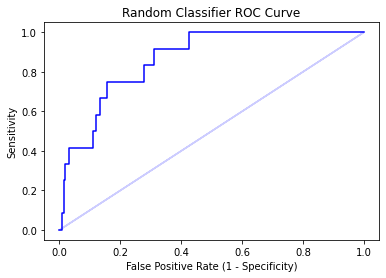

In [70]:
plt.step(false_positive_rate_values, sensitivity_values, color='b', where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('words_list_model ROC Curve')
plt.step(np.arange(0, 1, 0.001), np.arange(0, 1, 0.001), color='b', alpha=0.2,
         where='post')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('Sensitivity')
plt.title('Random Classifier ROC Curve')
plt.show()

In [71]:
roc_auc_score(Y_train, model_probabilities)

0.864952718676123